In [67]:
%matplotlib inline
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import os
import urllib
import keras

In [2]:
import re

In [3]:
youtube_df = pd.read_csv("USvideos.csv")

In [168]:
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Downloading thumbnails

In [ ]:
for vid in tqdm(youtube_df.video_id):
    url = "https://i.ytimg.com/vi/" + str(vid) +"/hqdefault.jpg"
    path = os.path.join("thumbnail", str(vid)+".jpg")
    resource = urllib.urlopen(url)
    
    output = open(path, "wb")
    output.write(resource.read())
    output.close()
    

# Tag filtering

In [5]:
# count all tags
tags = youtube_df.tags.str.split("|")

tags = [[tag.strip('"') for tag in tag_line] for tag_line in tags]

tag_counter = Counter()
for tag_line in tags:
    for tag in tag_line:
        tag_counter[tag] += 1

In [38]:
most_common = tag_counter.most_common()[:500]
most_common = [(tag,i) for tag, i in most_common if i > 100]
print(len(most_common))

500


In [39]:
most_common_tags = [tag for tag, i in most_common]

In [47]:
def filter_tags(tags):
    return [tag.strip('"') for tag in tags if tag.strip('"') in most_common_tags]

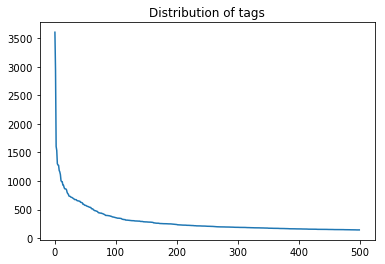

In [170]:
x = [tag for tag, i in most_common]
y = [i for tag, i in most_common]
plt.title('Distribution of tags')
plt.plot(y)

In [169]:
most_common_tags[:15]

['funny',
 'comedy',
 'how to',
 '[none]',
 'music',
 'Pop',
 '2018',
 'humor',
 'food',
 'science',
 'review',
 'makeup',
 'news',
 'celebrity',
 'vlog']

Tags before and after filtering

In [171]:
tags = youtube_df.tags[2].split("|")

tags

['racist superman',
 '"rudy"',
 '"mancuso"',
 '"king"',
 '"bach"',
 '"racist"',
 '"superman"',
 '"love"',
 '"rudy mancuso poo bear black white official music video"',
 '"iphone x by pineapple"',
 '"lelepons"',
 '"hannahstocking"',
 '"rudymancuso"',
 '"inanna"',
 '"anwar"',
 '"sarkis"',
 '"shots"',
 '"shotsstudios"',
 '"alesso"',
 '"anitta"',
 '"brazil"',
 '"Getting My Driver\'s License ',
 ' Lele Pons"']

In [50]:
filter_tags(tags)

['love',
 'lelepons',
 'hannahstocking',
 'rudymancuso',
 'inanna',
 'anwar',
 'sarkis',
 'shots',
 'shotsstudios',
 'alesso',
 'anitta',
 'brazil']

# Transform tags into binary encoded vectors

In [37]:
from sklearn.preprocessing import MultiLabelBinarizer

In [53]:
tags_dict = {}

for tags, video_id in zip(youtube_df.tags, youtube_df.video_id):
    tags_list = tags.split('|')
    filtered = filter_tags(tags_list)
    tags_dict[video_id] = filtered


In [57]:
labels = list(tags_dict.values())

mlb = MultiLabelBinarizer()

mlb.fit(labels)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [63]:
mlb.transform([tags_dict["puqaWrEC7tY"]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [75]:
# ids are needed to oreder data
video_ids = list(tags_dict.keys())

# ordered tags according to video_ids
tag_labels = [tags_dict[video_id] for video_id in video_ids]

#  0 1 encoded tags ordered by video_ids
Y_tags = mlb.transform(tag_labels)
              
              

# Image features

In [10]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
import numpy as np
import pickle
from tqdm import tqdm

Using TensorFlow backend.


In [88]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

In [89]:
def preprocess_image(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = image.load_img(image_path, target_size=(299, 299))
    # Convert PIL image to numpy array of 3-dimensions
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = preprocess_input(x)
    return x

In [90]:
image_model = InceptionV3(weights='imagenet')

96116736/96112376 [==============================] - 40s 0us/step


In [95]:
image_model_top = Model(image_model.input, image_model.layers[-2].output)

In [98]:
def encode(image_path):
     # preprocess the image
    image = preprocess_image(image_path)
    # Get the encoding vector for the image
    image_feature_vec = image_model_top.predict(image) 
    # reshape from (1, 2048) to (2048, )
    image_feature_vec = image_feature_vec.reshape(image_feature_vec.shape[1])
    
    return image_feature_vec
    

In [ ]:
# dict to hold  the features of images retrieved from image_model
image_feature_dict = {}

for img in tqdm(youtube_df.video_id):
    image_path = os.path.join("thumbnail", str(img)+".jpg")
    image_feature_dict[img] = encode(image_path)
    
    

image_features_pickle = open(os.path.join("image_features", "features.pkl"), 'wb')

pickle.dump(image_feature_dict, image_features_pickle)
image_features_pickle.close()

 60%|█████▉    | 24517/40949 [1:26:30<3:06:38,  1.47it/s]  

In [103]:
image_feature_dict['2kyS6SvSYSE']

array([0.13545969, 0.3783415 , 0.32912484, ..., 0.80654037, 0.2482816 ,
       0.6034405 ], dtype=float32)

In [109]:
image_features_pickle = open(os.path.join("image_features", "features.pkl"), 'wb')

pickle.dump(image_feature_dict, image_features_pickle)
image_features_pickle.close()

In [80]:
image_features_dict = pickle.load(open("image_features/features.pkl",'rb'))


In [81]:
# ordered image_features by video_ids
X_image = [image_features_dict[video_id] for video_id in video_ids]

# Filter descriptions

In [14]:

text = youtube_df.description[3]
text.lower()


"today we find out if link is a nickelback amateur or a secret nickelback devotee. gmm #1218\\ndon't miss an all new ear biscuits: https://goo.gl/xeznqt\\nwatch part 4: https://youtu.be/mhcdiib8cqg | watch part 2: https://youtu.be/7qiornao9fg\\nwatch today's episode from the start: http://bit.ly/gmm1218\\n\\npick up all of the official gmm merch only at https://mythical.store\\n\\nfollow rhett & link: \\ninstagram: https://instagram.com/rhettandlink\\nfacebook: https://facebook.com/rhettandlink\\ntwitter: https://twitter.com/rhettandlink\\ntumblr: https://rhettandlink.tumblr.com\\nsnapchat: @realrhettlink\\nwebsite: https://mythical.co/\\n\\ncheck out our other mythical channels:\\ngood mythical more: https://youtube.com/goodmythicalmore\\nrhett & link: https://youtube.com/rhettandlink\\nthis is mythical: https://youtube.com/thisismythical\\near biscuits: https://applepodcasts.com/earbiscuits\\n\\nwant to send us something? https://mythical.co/contact\\nhave you made a wheel of mythica

In [30]:
def filter_text(text):
    # if there is no description
    if type(text) is float:
        return ""
    doc = text.lower()
    exp = r'''https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)'''
    doc = re.sub(exp, r'',doc)
    doc  = re.sub(r"(?<=[a-z])\\\r?\\\n", " ", doc)
    doc = re.sub('\\\\n', '', doc)
    doc = re.sub(r'[^a-z ]', r'', doc)
    doc = re.sub(r' +', r' ', doc)
    return doc

print(filter_text(text).split())

['today', 'we', 'find', 'out', 'if', 'link', 'is', 'a', 'nickelback', 'amateur', 'or', 'a', 'secret', 'nickelback', 'devotee', 'gmm', 'dont', 'miss', 'an', 'all', 'new', 'ear', 'biscuits', 'watch', 'part', 'watch', 'part', 'watch', 'todays', 'episode', 'from', 'the', 'start', 'pick', 'up', 'all', 'of', 'the', 'official', 'gmm', 'merch', 'only', 'at', 'follow', 'rhett', 'link', 'instagram', 'facebook', 'twitter', 'tumblr', 'snapchat', 'realrhettlinkwebsite', 'check', 'out', 'our', 'other', 'mythical', 'channelsgood', 'mythical', 'more', 'rhett', 'link', 'this', 'is', 'mythical', 'ear', 'biscuits', 'want', 'to', 'send', 'us', 'something', 'have', 'you', 'made', 'a', 'wheel', 'of', 'mythicality', 'intro', 'video', 'submit', 'it', 'here', 'intro', 'animation', 'by', 'digital', 'twigs', 'intro', 'outro', 'music', 'by', 'jeff', 'zeigler', 'sarah', 'schimeneck', 'wheel', 'of', 'mythicality', 'theme', 'all', 'supplemental', 'music', 'fromopus', 'music', 'we', 'use', 'the', 'mouse', 'by', 'blue

Filter all descriptions

In [33]:
desc = youtube_df.description
description_dict = {}

for video_id, desc, title in zip(youtube_df.video_id, youtube_df.description, youtube_df.title):
    
    filtered_desc = filter_text(desc)
    filtered_title = filter_text(title)
    # print(desc)
    description_dict[video_id] = filtered_title + filtered_desc
    

Ordering descriptions by video_id

In [66]:
descriptions = [description_dict[video_id] for video_id in video_ids]


adding GLOVE vectors

In [ ]:
# Load Glove vectors
embeddings_index = {} 
f = open('glove/glove.6B.200d.txt', encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [71]:
max_fatures = 2000
max_len = 250
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(descriptions)
X_desc = tokenizer.texts_to_sequences(descriptions)
X_desc = keras.preprocessing.sequence.pad_sequences(X_desc, maxlen=max_len, padding='pre', truncating='pre')

creating embedding matrix to be used at training

In [73]:
vocab_size = len(tokenizer.word_index)+1

embedding_matrix = np.zeros((vocab_size, 200))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Model Setup

In [92]:
from keras.layers import LSTM, Embedding, Dense, Activation, concatenate, Dropout, 
from keras.models import Model
from keras import Input, layers

from keras.layers import Concatenate

In [104]:
Y_tags.shape[1]

500

In [183]:
image_features_size = X_image[0].shape[0]
desc_size = X_desc[0].shape[0]
embedding_dim = embedding_matrix.shape[1]
tags_size = Y_tags.shape[1]


inputs1 = Input(shape=(image_features_size,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(desc_size,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

predictor1 = Concatenate()([fe2, se3])
predictor2 = Dense(256, activation='relu')(predictor1)
outputs = Dense(tags_size, activation='sigmoid')(predictor2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)


In [106]:
model.layers[2]

In [184]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False


In [185]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 250)          0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 250, 200)     11975200    input_14[0][0]                   
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 2048)         0           input_13[0][0]                   
__________________________________________________________________________________________________
dropout_14

In [186]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])

## Data split

In [174]:
# X_image, X_desc, Y_tags

In [194]:
from sklearn.model_selection import train_test_split

X_image_train, X_image_test, X_desc_train, X_desc_test, Y_tags_train, Y_tags_test = train_test_split(X_image, X_desc, Y_tags, test_size=0.2)

In [199]:
history = model.fit([X_image_train, X_desc_train], Y_tags_train, epochs=20,batch_size=32, validation_split=0.1)

Train on 4572 samples, validate on 508 samples
Epoch 1/20
4572/4572 [==============================] - 101s 22ms/step - loss: 0.0770 - categorical_accuracy: 0.0094 - val_loss: 0.0467 - val_categorical_accuracy: 0.0039
Epoch 2/20
4572/4572 [==============================] - 100s 22ms/step - loss: 0.0441 - categorical_accuracy: 0.0096 - val_loss: 0.0412 - val_categorical_accuracy: 0.0118
Epoch 3/20
4572/4572 [==============================] - 102s 22ms/step - loss: 0.0386 - categorical_accuracy: 0.0230 - val_loss: 0.0365 - val_categorical_accuracy: 0.0138
Epoch 4/20
4572/4572 [==============================] - 101s 22ms/step - loss: 0.0335 - categorical_accuracy: 0.0385 - val_loss: 0.0316 - val_categorical_accuracy: 0.0492
Epoch 5/20
4572/4572 [==============================] - 98s 21ms/step - loss: 0.0300 - categorical_accuracy: 0.0628 - val_loss: 0.0298 - val_categorical_accuracy: 0.0492
Epoch 6/20
4572/4572 [==============================] - 101s 22ms/step - loss: 0.0275 - categorical

In [200]:
model.save('model_image_desc.h5')

In [202]:
prediction = model.predict([X_image_test, X_desc_test], batch_size=32)

Hamming loss 
$$\frac{1}{|X|} \frac{1}{|L|}\sum_{i \; in \; samples} \sum_{j \; in \; tags}  1(f(x_{i})_{j} \not = y_{ij})$$  

Where $x_i$ is an input sample, $y_{ij}$ is a true label for the $j$ tag in sample $i$, $f$ is a prediction model, $|X| $ is amount of samlpes, $|L|$ is amount of unique tags.

In [218]:
# Hamming Loss
# fraction of wrongly predicted tags

def hamming_loss(pred, Y):
    return ((pred>0.5) != Y).sum()/(500*len(Y))

hamming_loss(prediction, Y_tags_test)*500

2.450039339103068

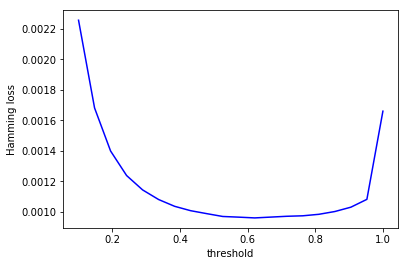

In [210]:
def plot_hamming_loss(prediction, Y_tags):
    pred = np.array(prediction)
    Y = np.array(Y_tags)
    
    y = [((pred>i) != Y).sum()/(500*len(video_ids)) for i in np.linspace(0.1, 1, 20)]
    x = np.linspace(0.1, 1, 20)
    
    plt.plot(x,y,'-b')
    plt.xlabel('threshold')
    plt.ylabel('Hamming loss')
    
plot_hamming_loss(prediction, Y_tags_test)

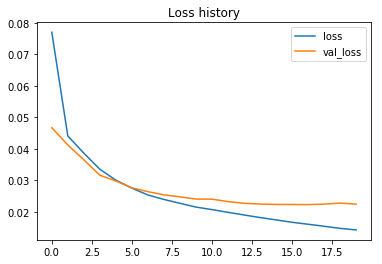

In [201]:
def plot_history(history):
    val_loss = history.history['val_loss']
    loss = history.history['loss']

    plt.plot(loss, label='loss')
    plt.plot(val_loss, label='val_loss')
    plt.legend()
    plt.title('Loss history')
    
plot_history(history)

2.45 tags are predicted wrongly in average for test videos.

We can see that the model was able to train due to the loss history and evaluation metrics.

# Model without graphical information

In [214]:
# image_features_size = X_image[0].shape[0]
desc_size = X_desc[0].shape[0]
embedding_dim = embedding_matrix.shape[1]
tags_size = Y_tags.shape[1]


inputs2 = Input(shape=(desc_size,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)


predictor1 = Dense(256, activation='relu')(se3)
outputs = Dense(tags_size, activation='sigmoid')(predictor1)

model = Model(inputs=inputs2, outputs=outputs)


In [215]:
model.layers[1].set_weights([embedding_matrix])
model.layers[1].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 250)               0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 250, 200)          11975200  
_________________________________________________________________
dropout_15 (Dropout)         (None, 250, 200)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 256)               467968    
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 500)               128500    
Total params: 12,637,460
Trainable params: 662,260
Non-trainable params: 11,975,200
__________________________________________________________

In [216]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [217]:
history = model.fit(X_desc_train, Y_tags_train, epochs=20,batch_size=32, validation_split=0.1)

Train on 4572 samples, validate on 508 samples
Epoch 1/20
4572/4572 [==============================] - 101s 22ms/step - loss: 0.0856 - categorical_accuracy: 0.0059 - val_loss: 0.0492 - val_categorical_accuracy: 0.0335
Epoch 2/20
4572/4572 [==============================] - 100s 22ms/step - loss: 0.0483 - categorical_accuracy: 0.0061 - val_loss: 0.0476 - val_categorical_accuracy: 0.0039
Epoch 3/20
4572/4572 [==============================] - 98s 21ms/step - loss: 0.0460 - categorical_accuracy: 0.0131 - val_loss: 0.0438 - val_categorical_accuracy: 0.0079
Epoch 4/20
4572/4572 [==============================] - 98s 21ms/step - loss: 0.0428 - categorical_accuracy: 0.0238 - val_loss: 0.0405 - val_categorical_accuracy: 0.0276
Epoch 5/20
4572/4572 [==============================] - 99s 22ms/step - loss: 0.0395 - categorical_accuracy: 0.0262 - val_loss: 0.0371 - val_categorical_accuracy: 0.0315
Epoch 6/20
4572/4572 [==============================] - 99s 22ms/step - loss: 0.0368 - categorical_ac

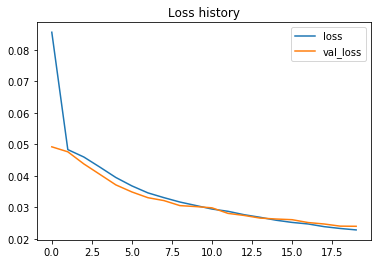

In [219]:
plot_history(history)

In [220]:
prediction = model.predict(X_desc_test, batch_size=32)

In [221]:
hamming_loss(prediction, Y_tags_test)*500

2.572777340676633

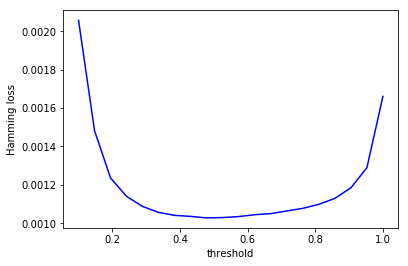

In [222]:

    
plot_hamming_loss(prediction, Y_tags_test)

In [163]:
((prediction>0.5) != Y_tags).sum()/(len(video_ids))

2.3978900960478664

Average amount of wrongly predicted tags on lstm classifier 2.398

In [223]:
model.save('model_no_image.h5')

# Example

In [243]:
mlb.inverse_transform(prediction>0.5)[114]


('Fallon Stand-up',
 'Fallon monologue',
 'Funny',
 'Jimmy Fallon',
 'NBC',
 'NBC TV',
 'Talk Show',
 'Television',
 'The Tonight Show',
 'celebrities',
 'clip',
 'comedian',
 'comedic',
 'comedy sketches',
 'funny video',
 'highlight',
 'humor',
 'interview',
 'jokes',
 'show',
 'snl',
 'talent',
 'tonight',
 'variety',
 'video')

In [244]:
mlb.inverse_transform(Y_tags_test)[114]

('Best',
 'Fallon Stand-up',
 'Fallon monologue',
 'Funny',
 'Jimmy Fallon',
 'NBC',
 'NBC TV',
 'Talk Show',
 'Television',
 'The Tonight Show',
 'celebrities',
 'christmas',
 'clip',
 'comedic',
 'comedy sketches',
 'funny video',
 'humor',
 'interview',
 'jokes',
 'movie',
 'music',
 'show',
 'snl',
 'star wars',
 'talent',
 'the last jedi',
 'tonight',
 'trailer',
 'variety',
 'video')

So we can make a conslusion that adding extra rgafical information allowed to gain  better results.

https://medium.com/datadriveninvestor/predicting-tags-for-the-questions-in-stack-overflow-29438367261e
https://www.kaggle.com/datasnaek/youtube-new
